In [4]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import pickle
from urllib.parse import urljoin

Network saved as 'rickmorty_character_network.pkl'.
Number of nodes (characters): 698
Number of edges (connections): 2262


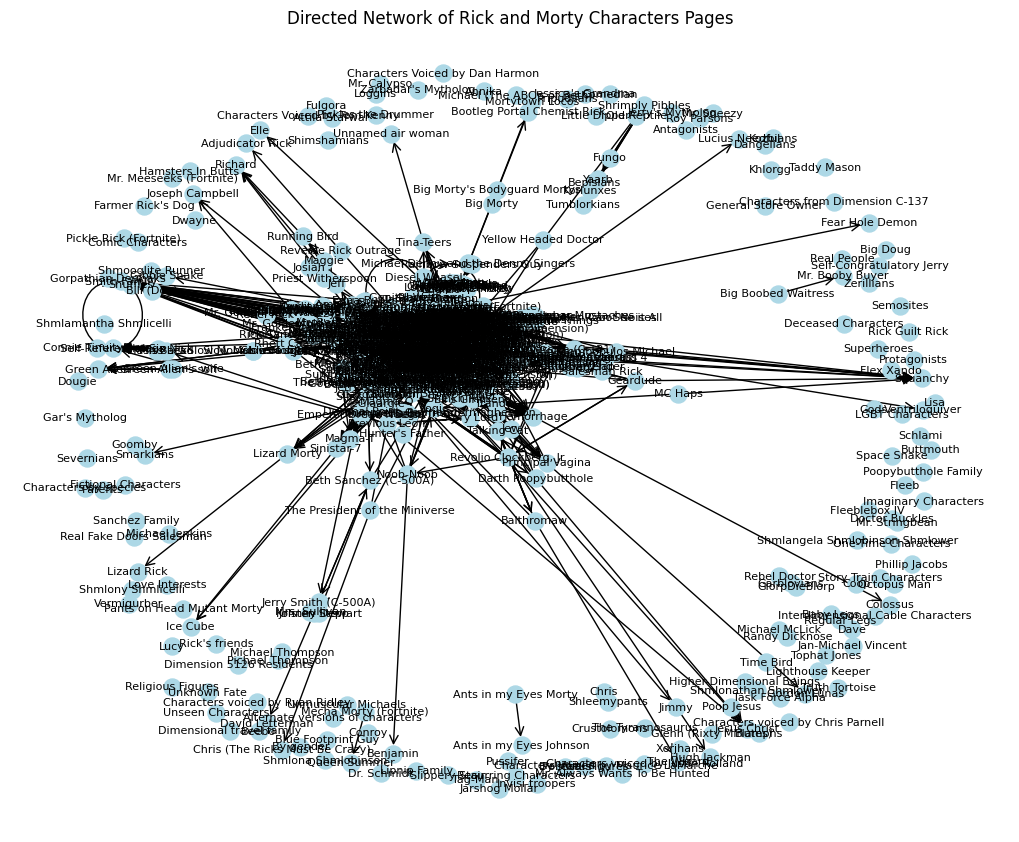

In [ ]:
# Path to the folder containing character JSON files
character_folder = "rickmorty_characters"

# Base URL of the Fandom wiki for comparison
base_url = "https://rickandmorty.fandom.com/wiki/"

# Step 1: Parse all character files
character_files = [f for f in os.listdir(character_folder) if f.endswith('.json')]
character_names = set()
character_links = {}

for file in character_files:
    with open(os.path.join(character_folder, file), 'r', encoding='utf-8') as f:
        data = json.load(f)
        # Store character name
        character_names.add(data['name'])
        # Map character to their valid links
        character_links[data['name']] = data['linked_pages']

# Step 2: Filter valid links (only keep links to other characters)
filtered_links = {}
for character, links in character_links.items():
    valid_links = [link for link in links if os.path.basename(link) in {f.split('.json')[0] for f in character_files}]
    filtered_links[character] = valid_links

# Step 3: Build the network
G = nx.DiGraph()  # Directed graph since links have direction

# Add nodes and edges
for character, links in filtered_links.items():
    G.add_node(character)  # Add character as a node
    for link in links:
        linked_character = os.path.basename(link).replace('_', ' ')  # Convert link to character name
        if linked_character in character_names:
            G.add_edge(character, linked_character)  # Add edge if the linked character is valid

print(f"Number of nodes (characters): {G.number_of_nodes()}")
print(f"Number of edges (connections): {G.number_of_edges()}")

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    font_size=8,
    node_size=150,
    font_color="black",
    arrowstyle='->',
    arrows=True,
    arrowsize=15
)
plt.title("Directed Network of Rick and Morty Characters Pages")
plt.show()


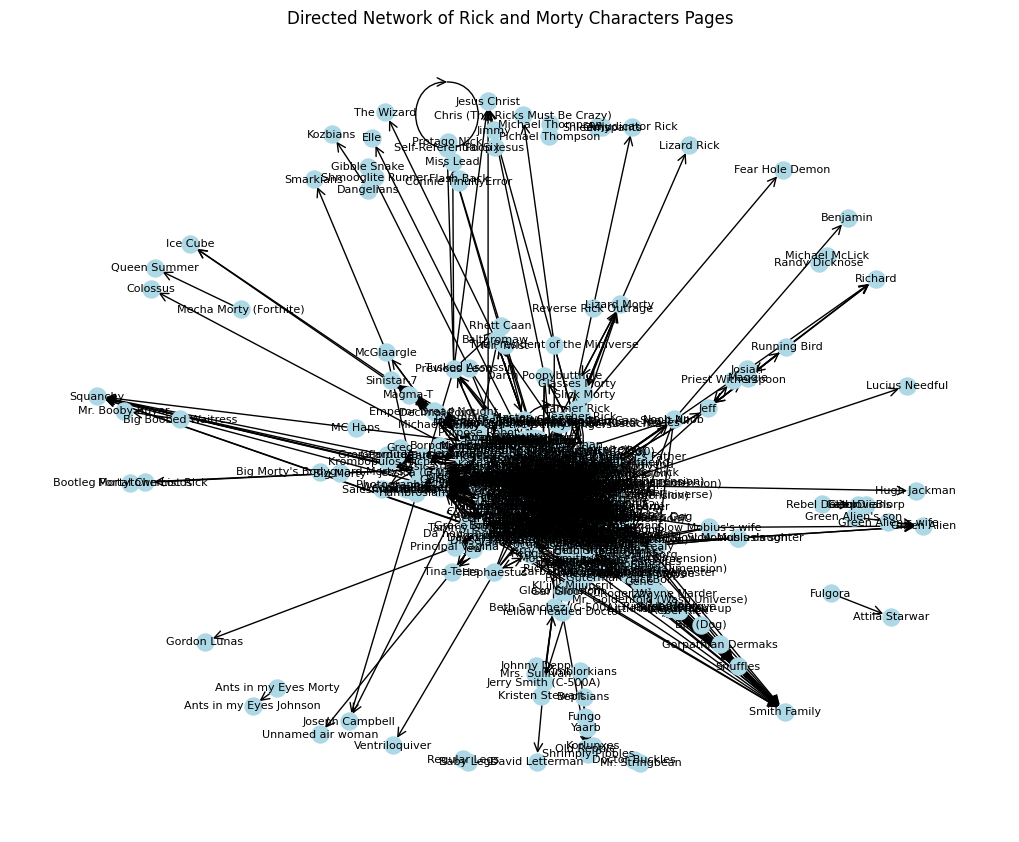

Number of nodes (characters): 586
Number of edges (connections): 2262
Network saved as 'rickmorty_character_network.pkl'.


In [10]:
zero_degree_nodes = [node for node in G.nodes() if G.degree(node) == 0]
G.remove_nodes_from(zero_degree_nodes)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    font_size=8,
    node_size=150,
    font_color="black",
    arrowstyle='->',
    arrows=True,
    arrowsize=15
)
plt.title("Directed Network of Rick and Morty Characters Pages")
plt.show()

print(f"Number of nodes (characters): {G.number_of_nodes()}")
print(f"Number of edges (connections): {G.number_of_edges()}")

with open("rickmorty_character_network.pkl", "wb") as f:
    pickle.dump(G, f)

# Print some basic network stats
print(f"Network saved as 'rickmorty_character_network.pkl'.")

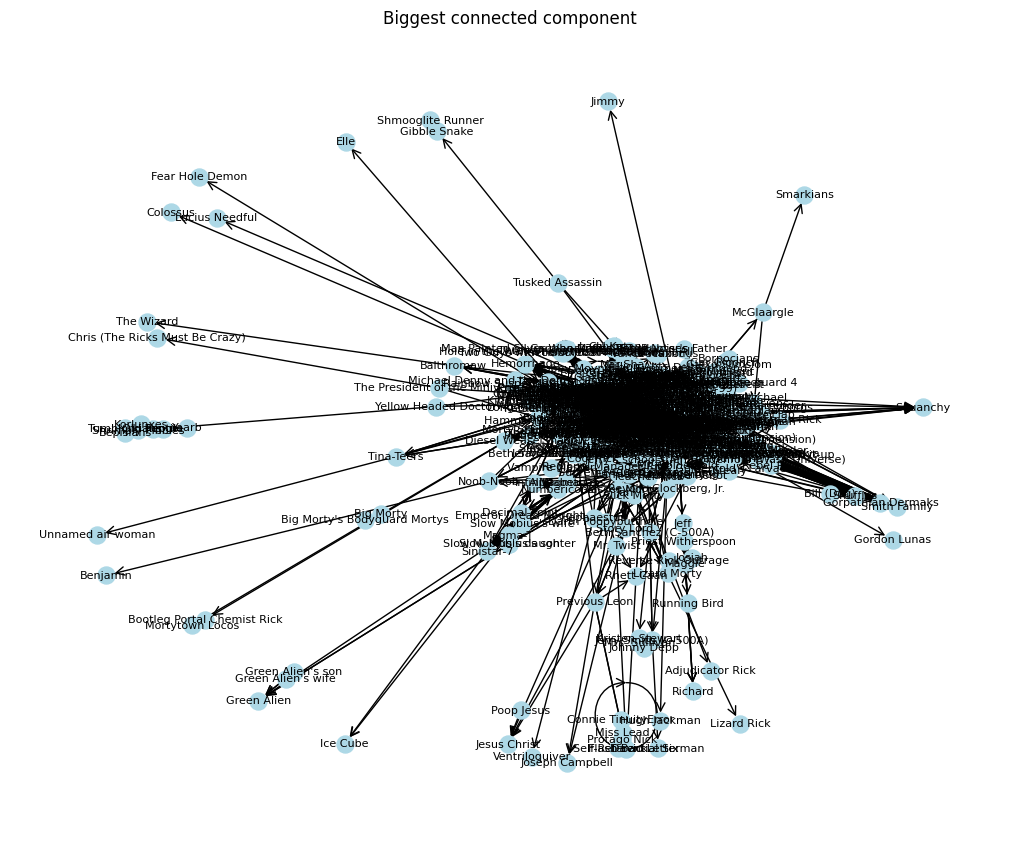

In [11]:
components = nx.weakly_connected_components(G) # we use weakly connected components as the graph is directed
components_ordered = sorted(components, key=len, reverse=True)
biggest_component = components_ordered[0]

G_biggest_component = G.subgraph(biggest_component).copy()
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_biggest_component)
nx.draw(
    G_biggest_component,
    pos,
    with_labels=True,
    node_color="lightblue",
    font_size=8,
    node_size=150,
    font_color="black",
    arrowstyle='->',
    arrows=True,
    arrowsize=15
)
plt.title("Biggest connected component")
plt.show()

In [12]:
print(f"Number of nodes in the graph: {G_biggest_component.number_of_nodes()}")
print(f"Number of edges in the graph: {G_biggest_component.number_of_edges()}")

Number of nodes in the graph: 563
Number of edges in the graph: 2245


In [13]:
er = nx.gnm_random_graph(G_biggest_component.number_of_nodes(), G_biggest_component.number_of_edges(), directed=True)

out_degrees = [d for n, d in G_biggest_component.out_degree()]
out_degrees_er = [d for n, d in er.out_degree()]
content_lengths = [data['content_length'] for _, data in G_biggest_component.nodes(data=True)]

bins = range(min(out_degrees), max(out_degrees) + 1)
bins_er = range(min(out_degrees_er), max(out_degrees_er) + 1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.hist(out_degrees, bins=bins, color='#3498db', alpha=0.7, edgecolor='white', label='Country performers out-degree')
plt.title('Country performers out-degree', fontsize=16, fontweight='bold', color='#34495e')
plt.xlabel('Out-degree', fontsize=12, fontweight='bold', color='#34495e')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#34495e')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 3, 2)
plt.hist(out_degrees_er, bins=bins_er, color='#e74c3c', alpha=0.7, edgecolor='white', label='Random graph out-degree')
plt.title('Random graph out-degree', fontsize=16, fontweight='bold', color='#34495e')
plt.xlabel('Out-degree', fontsize=12, fontweight='bold', color='#34495e')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#34495e')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 3, 3)
plt.hist(content_lengths, bins=30, color='#2ecc71', alpha=0.7, edgecolor='white', label='Content Length')
plt.title('Content Length Distribution', fontsize=16, fontweight='bold', color='#34495e')
plt.xlabel('Word Count', fontsize=12, fontweight='bold', color='#34495e')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#34495e')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()


KeyError: 'content_length'